<a href="https://colab.research.google.com/github/Raagulbharatwaj/Understanding-Deep-Learning/blob/main/Mastering_Deep_Learning_The_Art_of_Approximating_Non_Linearities_with_Piecewise_Estimations_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Layer

In [2]:
x = np.linspace(-1*np.pi,2*np.pi,100000)
y = np.sin(2*x) + np.cos(x) + x

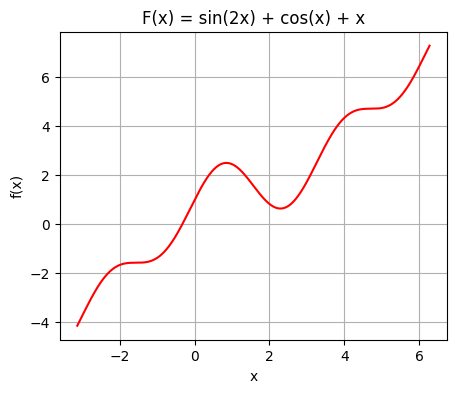

In [3]:
plt.figure(figsize=(5, 4))
plt.plot(x,y,color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('F(x) = sin(2x) + cos(x) + x')
plt.grid(True)
plt.show()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(3,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Dense(3,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',loss='mse')

In [7]:
model.fit(x,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 18s 5ms/step - loss: 1.9901
Epoch 2/5
3125/3125 [==============================] - 11s 4ms/step - loss: 0.7830
Epoch 3/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6904
Epoch 4/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.6621
Epoch 5/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6543


In [8]:
for layer in model.layers:
  print(layer.name)

dense
dense_1
dense_2
dense_3


In [9]:
def visualize_indemediate_estimations(model, x_values, y_true):
    y_pred = model.predict(x_values,verbose=0)
    dense_0_model = tf.keras.Model(inputs=model.input,outputs=model.layers[0].output)
    dense_1_model = tf.keras.Model(inputs=model.input,outputs=model.layers[1].output)
    dense_2_model = tf.keras.Model(inputs=model.input,outputs=model.layers[2].output)
    dense_0_out = dense_0_model.predict(x,verbose=0)
    dense_1_out = dense_1_model.predict(x,verbose=0)
    dense_2_out = dense_2_model.predict(x,verbose=0)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for i in range(3):
        axes[i].plot(x, dense_0_out[:,i])
        axes[i].set_title(f'hidden unit {i + 1}')
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('h=wx+b')
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(x,dense_1_out)
    plt.xlabel('x')
    plt.ylabel('y\'')
    plt.title('Latent Representation of x as y\'')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for i in range(3):
        axes[i].plot(x, dense_2_out[:,i])
        axes[i].set_title(f'hidden {i + 1}')
        axes[i].set_xlabel('y\'')
        axes[i].set_ylabel('h\'=wy\'+b')
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(dense_1_out,y_pred)
    plt.xlabel('y\'')
    plt.ylabel('y')
    plt.title('Relationship between latent space and output space')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [10]:
def visualize_piecewise_estimation(model, x_values, y_true):
    y_pred = model.predict(x_values)
    plt.figure(figsize=(12, 6))
    plt.title('Piecewise Estimation of Output')
    plt.plot(x_values, y_true,c='red', label='True Output')
    plt.plot(x_values, y_pred,color = 'blue', label='Predicted Output')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.grid(True)
    plt.legend()
    plt.show()

3125/3125 [==============================] - 5s 1ms/step


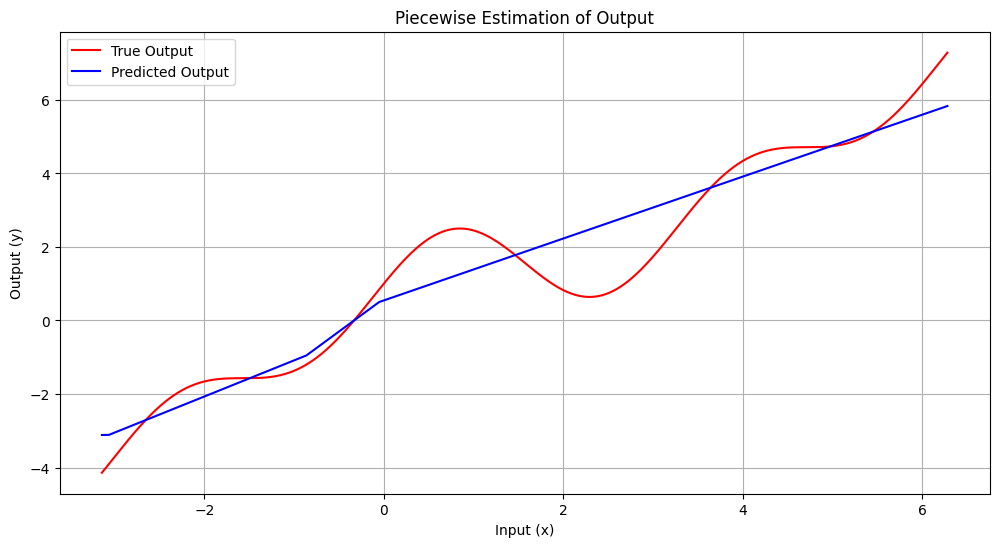

In [11]:
visualize_piecewise_estimation(model,x,y)

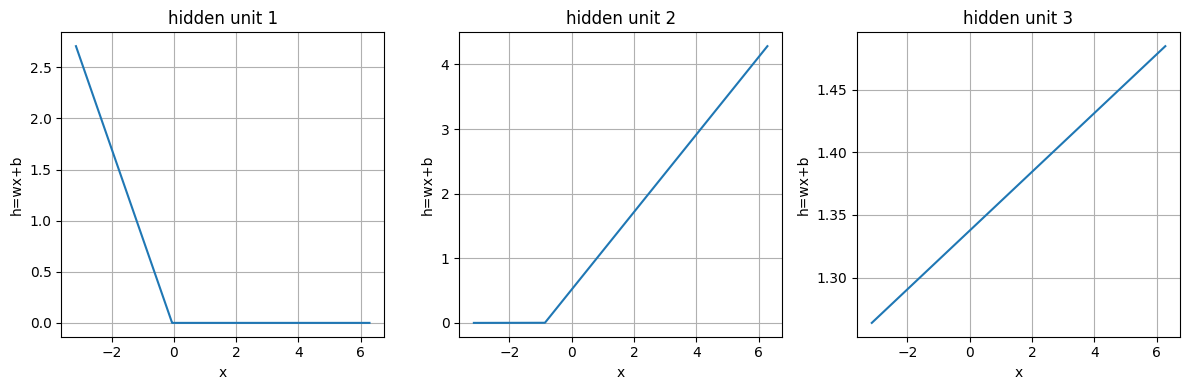

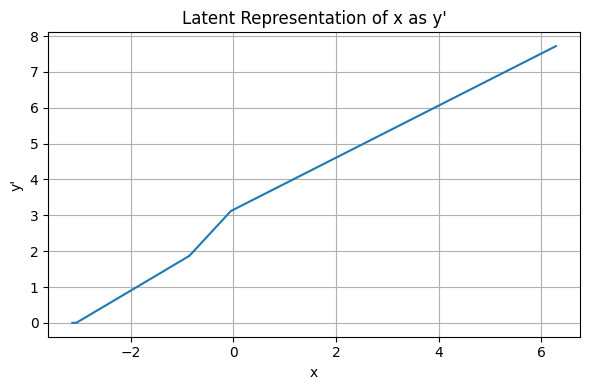

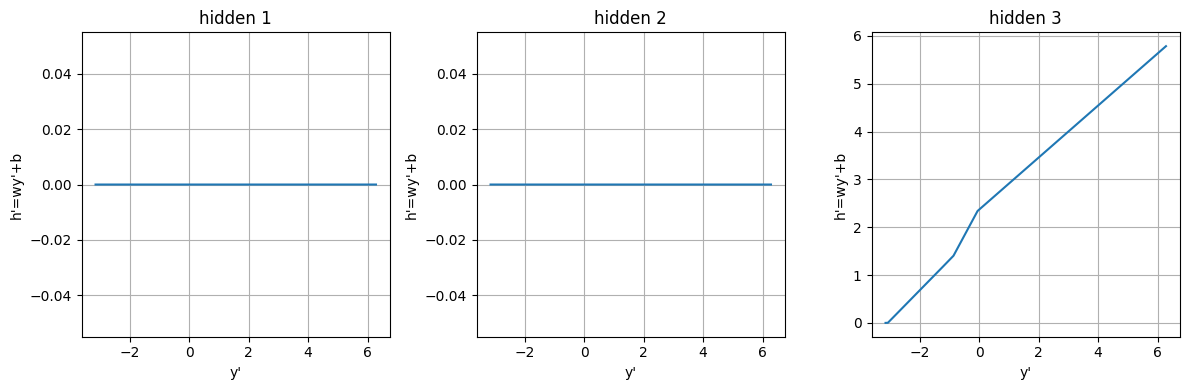

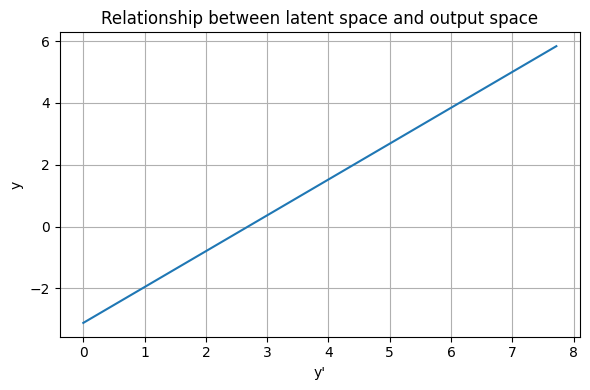

In [12]:
visualize_indemediate_estimations(model,x,y)

In [13]:
def visualize_latent_space(model, x_values, y_true):
    y_pred = model.predict(x_values)
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
    y_prime_values = intermediate_layer_model.predict(x_values)

    plt.figure(figsize=(12, 6))
    # Plot y' vs. x
    plt.plot(x_values, y_prime_values)
    plt.xlabel('x')
    plt.ylabel('y\'')
    plt.grid(True)
    plt.title('Latent Representation of x as y\'')

    plt.figure(figsize=(12, 6))
    # Plot y vs. y'
    plt.plot(y_prime_values, y_pred)
    plt.xlabel('y\'')
    plt.ylabel('y')
    plt.grid(True)
    plt.title('Relationship between latent space and output space')
    plt.figure(figsize=(12, 6))

    # Plot y vs. x
    plt.title('Piecewise Estimation of Output')
    plt.plot(x_values, y_true, label='True Output', linestyle='--')
    plt.plot(x_values, y_pred, label='Predicted Output')
    plt.xlabel('Input (x)')
    plt.grid(True)
    plt.ylabel('Output (y)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(7,activation='relu'),
    tf.keras.layers.Dense(7,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 14        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 1)                 8         
                                                                 
Total params: 78 (312.00 Byte)
Trainable params: 78 (312.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer="adam",loss="mse")

In [27]:
model.fit(x,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 7s 2ms/step - loss: 1.0314
Epoch 2/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.1903
Epoch 3/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0998
Epoch 4/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0996
Epoch 5/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0997


3125/3125 [==============================] - 6s 2ms/step


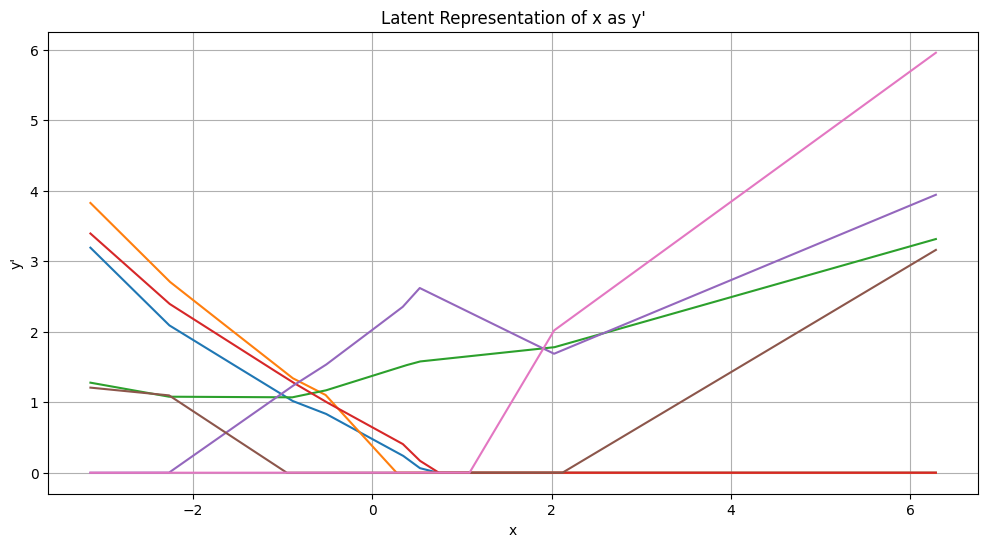

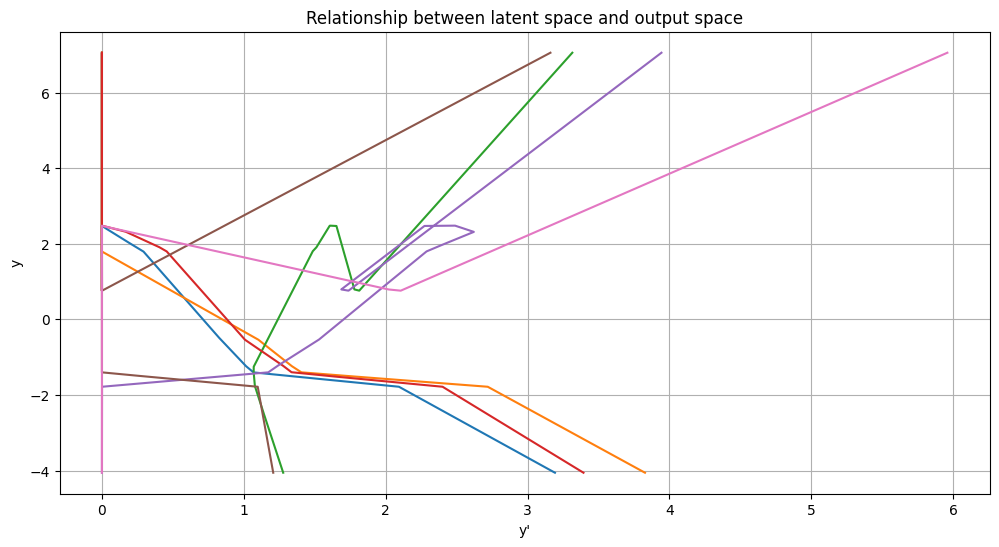

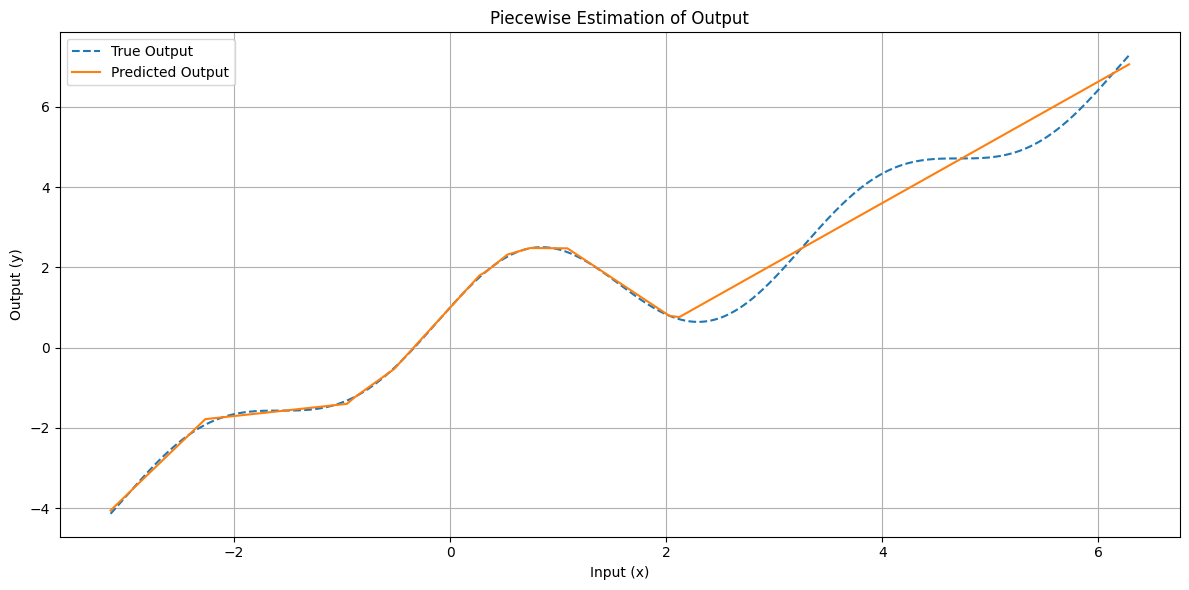

In [28]:
visualize_latent_space(model,x,y)

In [29]:
def generate_distribution(num_examples):
  x = np.linspace(-2 * np.pi, 2 * np.pi, num_examples)
  y = np.sin(x) + np.sin(2 * x) * np.cos(3 * x) + 0.2 * np.sin(5 * x) * np.cos(7 * x) + 0.1 * np.sin(10 * x)
  noise = np.random.normal(0,0.15,num_examples)
  y_noise = y + noise
  return x,y,y_noise

In [30]:
x,y,y_noise = generate_distribution(1000)

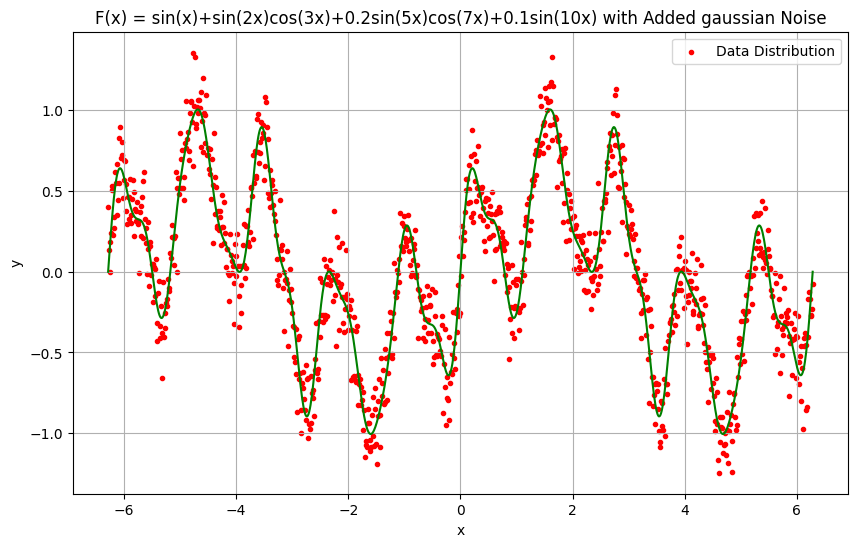

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x,y,color='green')
plt.scatter(x, y_noise,c='red', marker='.', label='Data Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('F(x) = sin(x)+sin(2x)cos(3x)+0.2sin(5x)cos(7x)+0.1sin(10x) with Added gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
def create_shallow_nn(k):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  # Input layer
        tf.keras.layers.Dense(k, activation='relu'),  # Hidden layer with k neurons and ReLU activation
        tf.keras.layers.Dense(1)  # Output layer with 1 neuron
    ])
    model.compile(optimizer='adam', loss='mse')  # Mean squared error loss
    return model

def create_dense_nn(k):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  # Input layer
        tf.keras.layers.Dense(k, activation='relu'),
        tf.keras.layers.Dense(k, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer with 1 neuron
    ])
    model.compile(optimizer='adam', loss='mse')  # Mean squared error loss
    return model

In [46]:
def visualize_piecewise_estimation(model, x_values, y_true,y):
    y_pred = model.predict(x_values)
    plt.figure(figsize=(12, 6))
    plt.title('Piecewise Estimation of Output')
    plt.scatter(x_values, y_true,c='blue', marker='.', label='True Output')
    plt.plot(x_values, y_pred,color = 'yellow', label='Predicted Output')
    plt.plot(x_values, y,color = 'orange',linestyle='--', label='Distribution')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [34]:
x_train,y,y_train = generate_distribution(100000)

In [37]:
model = create_dense_nn(64)

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                128       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1662
Epoch 2/5
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1275
Epoch 3/5
3125/3125 [==============================] - 8s 2ms/step - loss: 0.1205
Epoch 4/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1088
Epoch 5/5
3125/3125 [==============================] - 8s 2ms/step - loss: 0.1024


3125/3125 [==============================] - 6s 2ms/step


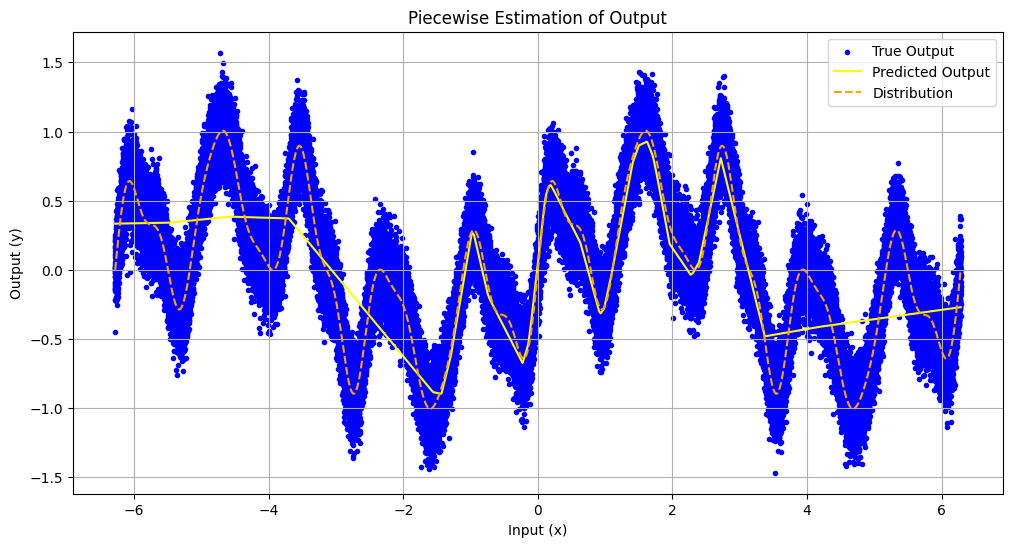

In [47]:
visualize_piecewise_estimation(model,x_train,y_train,y)